<a href="https://colab.research.google.com/github/cuocchie/Topic_detection/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Detection - Hướng dẫn sơ bộ

#### Nội dung Notebook bao gồm:
1. **Hiểu bài toán**
2. **Lấy dữ liệu (Gather Data)**
3. **Khảo sát dữ liệu (Explore Data)**
4. **Chọn mô hình (Choose model)**
5. **Chuẩn bị dữ liệu (Prepare data)**
6. **Xây dựng, huấn luyện, đánh giá mô hình (Build, Train, Evaluate Model)**
7. **Điều chỉnh tham số (Tune Hyperparameters)**

------------

## 1. Hiểu bài toán
Bài toán **Topic Detection** yêu cầu với mỗi dữ liệu đầu vào là một đoạn văn dạng chuỗi máy sẽ gán nhãn cho đoạn văn đó thuộc chủ đề nào.
**Topic Detection** là bài toán thuộc dạng **Text Classification** nhằm phân loại tài liệu văn bản thành một trong các chủ đề được xác định trước. Việc phân loại này chủ yếu dựa vào các từ khóa trong văn bản.

## 2. Lấy dữ liệu (Gather Data)

Dữ liệu thô ban đầu dưới dạng file text *(topic\_detection\_train.v1.0.txt)*. 
Nội dung file gồm các dòng, mỗi dòng bao gồm 1 cặp giá **(label, text)** chi tiết thể hiện dưới đây. Có thể thấy giữa **label** và **text** là kí tự ' ', label được phân biệt bằng **'\_\_label\_\_'**. Dữ liệu text chứa nhiều nhiễu (icon, kí tự thừa).

`__label__Du_lich Theo hành trình tour du lịch Mỹ - Bờ Đông, ...4253/`

## 3. Khảo sát dữ liệu (Explore Data)

### Import các thư viện cần dùng

In [ ]:
pip install underthesea

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from underthesea import word_tokenize


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Đọc dữ liệu
Đọc dữ liệu từ file `topic_detection_train.v1.0.txt`, chuyển về 
`` DataFrame
``

In [2]:
# Open data in rb mode
data = open('/content/drive/MyDrive/Khai phá + MXH/Khai phá dữ liệu/raw_data/topic_detection_train.v1.0.txt', 'rb').readlines()

labels, texts = ([], [])
for line in data:
    label, text = line.decode().split(' ', 1) # Get label and text
    label = label[len('__label__'):] # remove '__label__' from label
    # append to list
    labels.append(label) 
    texts.append(text)

# create dataframe to store value
df = pd.DataFrame()
df['label'] = labels
df['text'] = texts
df['cleaned_text'] = texts

In [ ]:
df

label  ...                                       cleaned_text
0                        Du_lich  ...  Theo hành trình tour du lịch Mỹ - Bờ Đông, du ...
1                        Nha_dat  ...  mình cần tìm 1 phòng cho khoảng 3 người  quanh...
2                        Nha_dat  ...  Cho thuê nhà riêng dt 60m/sàn.  Có 4 phòng ngủ...
3                        Nha_dat  ...  Cho thuê nhà ở tầng 4 khép kín, 4/295 Nguyễn K...
4                        Mua_sam  ...  ► Crumpler jackpack full photo ► giá : 800.000...
...                          ...  ...                                                ...
15995           Do_an_va_do_uong  ...  CÁC MÓN KIM CHI NGON CHO MÙA THU -------------...
15996                    Nha_dat  ...  Cần cho thuê Chung cư Greenstar 234 Phạm Văn Đ...
15997  Kinh_doanh_va_Cong_nghiep  ...  CHƯƠNG TRÌNH HỌC PHÍ THÁNG 08/2016  TẶNG NGAY ...
15998                Nha_va_vuon  ...  Bố trí thông minh giúp nhà ống Sài Gòn không c...
15999  Kinh_doanh_va_Cong_nghiep  ...  Chúc mừng sinh nhật Hoàng Gia Media Group tròn...

[16000 rows x 3 columns]

### Clean data

#### Lấy danh sách stop words

In [3]:
f = open('/content/drive/MyDrive/Khai phá + MXH/Khai phá dữ liệu/stop words.txt', 'r', encoding='UTF-8')
stopwords = [s.strip() for s in f.readlines()]

In [4]:
def delete_stop_word(word):
    words = []
    if word not in stopwords:
        return f' {word}'
    return ''
def remove_stopwords(df):
    cleaned_text = []
    for i in range(len(df)):
        comment = df['text'].iloc[i]
        comment_tokens = word_tokenize(comment)
        comment_removed_sw = ''
        for token in comment_tokens:
            comment_removed_sw += delete_stop_word(token)
        cleaned_text.append(comment_removed_sw)
    return cleaned_text

In [5]:
df['cleaned_text'] = remove_stopwords(df)

#### Loại bỏ kí tự thừa, đưa về chữ thường

In [6]:
cleaned_text = []
for comment in df['cleaned_text'].values:
    comment = re.sub('\W+|http|https|www|com|COM|HTTP|HTTPS|WWW|net|NET|ORG|org', ' ', comment) # thiếu
    comment = re.sub('[0-9]', ' ', comment)
    comment = re.sub('_', ' ', comment)
    comment = re.sub('(?<=\s) +|^ +(?=\s)', '', comment).strip() # Bỏ các kí tự trắng thừa
    comment = comment.lower()
    # words = word_tokenize(clean_text)
    cleaned_text.append(comment)
    # words = clean_text.split() # tách từ theo mỗi dấu cách => tính số từ
    # word_count.append(len(words))

df['cleaned_text'] = cleaned_text
# temp_df_count_words['words_number'] = word_count

Khảo sát số từ

In [7]:
count_word = []
for text in df.cleaned_text:
  count_word.append(len(text))
df['count_words'] = count_word

In [ ]:
df

label  ... num_label
0                        Du_lich  ...         4
1                        Nha_dat  ...        15
2                        Nha_dat  ...        15
3                        Nha_dat  ...        15
4                        Mua_sam  ...        13
...                          ...  ...       ...
15995           Do_an_va_do_uong  ...         3
15996                    Nha_dat  ...        15
15997  Kinh_doanh_va_Cong_nghiep  ...         9
15998                Nha_va_vuon  ...        16
15999  Kinh_doanh_va_Cong_nghiep  ...         9

[16000 rows x 6 columns]

## 3. Chọn Mô hình

### Kiểm tra một số đặc điểm cơ bản của bảng

#### Số giá trị *(samples)* của bảng

Số hàng có trong bảng: `16000 samples`

In [ ]:
print('Number of samples', df.count())

Number of samples label           16000
text            16000
cleaned_text    16000
count_words     16000
dtype: int64


#### Số `label` và số lượng giá trị với `label` tương ứng

Kiểm tra các số lượng `label`: 23 labels và số lượng samples với mỗi `label`

In [8]:
print('number of unique labels: ', df['label'].value_counts().count())
sorted_label = df['label'].value_counts()
sorted_label

number of unique labels:  23


Nha_dat                         2542
Kinh_doanh_va_Cong_nghiep       2356
Do_an_va_do_uong                2356
Tai_chinh                       1379
Mua_sam                         1169
Du_lich                          881
Chinh_tri                        796
Giao_duc                         697
Nghe_thuat                       609
Mang_internet_va_vien_thong      593
Sach                             415
Con_nguoi_va_xa_hoi              387
Lam_dep_va_the_hinh              283
Nha_va_vuon                      262
Giai_tri                         211
May_tinh_va_thiet_bi_dien_tu     202
Suc_khoe_va_benh_tat             194
Thoi_quen_va_so_thich            160
Khoa_hoc                         160
Phap_luat                        131
Giao_thong                       108
The_thao                          76
Cong_nghe_moi                     33
Name: label, dtype: int64

Phân bố số lượng samples với mỗi `label` là không đều, độ lệch lớn.

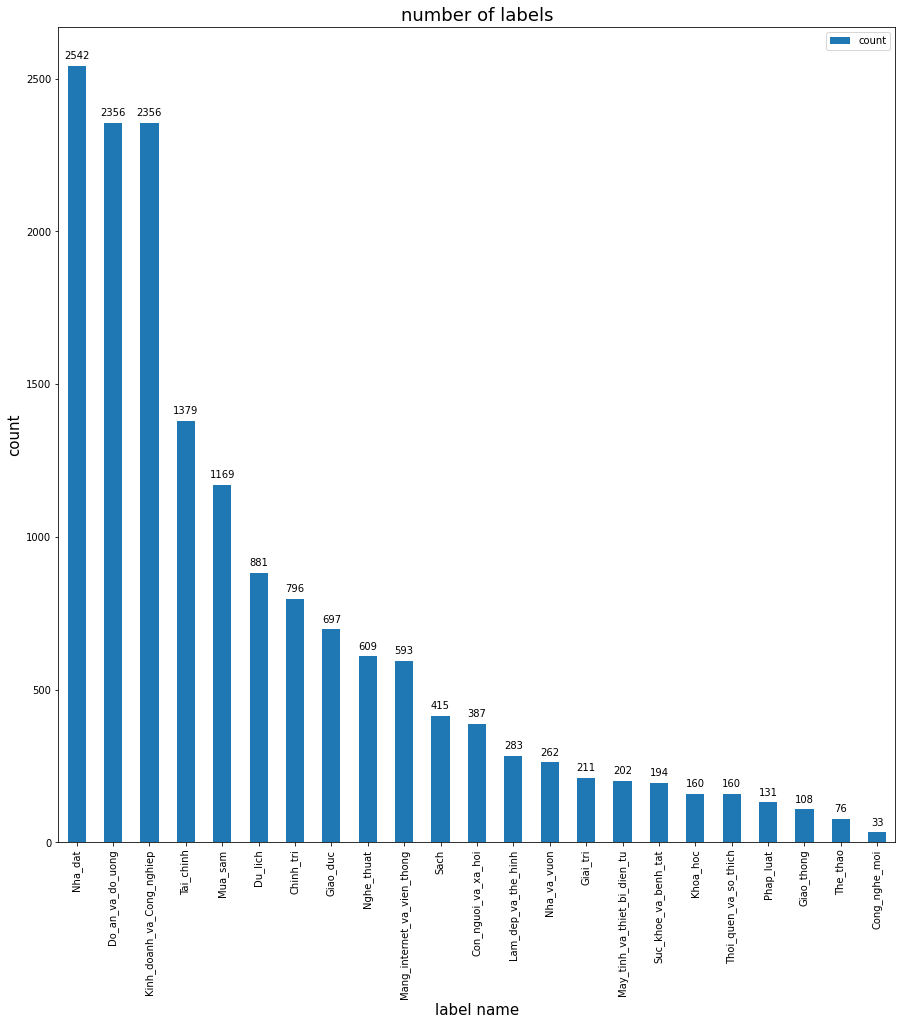

In [ ]:
sorted_label = sorted_label.to_frame('count')
chart = sorted_label.plot(kind='bar', figsize=(15, 15))
plt.rcParams['figure.dpi'] = 140
plt.xlabel('label name', size=15)
plt.ylabel('count', size=15)
plt.title('number of labels', size=18)
for p in chart.patches:
    chart.annotate(p.get_height(),
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')


Quy luật của label

In [19]:
list_cmt_token = []
cleaned = []
replace_words = ['bitly', 'bit', 'ly', 'google', 'goo', 'gl', 'html']
for cmt in df.cleaned_text:
    for word in replace_words:
        cmt = cmt.replace(word, '')
    cleaned.append(cmt)
    cmt_token = word_tokenize(cmt)
    list_cmt_token.append(cmt_token)
df['token'] = list_cmt_token
df['cleaned_text'] = cleaned

In [20]:
f = open('/content/drive/MyDrive/Khai phá + MXH/Khai phá dữ liệu/nteen.txt', 'r', encoding = 'UTF-8' )
short_list = []
shortform_dict = {}
for line in f:
    line_strip = line.strip()
    try:
        [short, full] = line_strip.split('\t')
    except Exception as e:
        [short, full] = line_strip.split(' ', 1)
    shortform_dict[short] = full
    short_list.append(short)

sorted_short_list = sorted_list = sorted(short_list, key=len, reverse=True)
change = 0
cleaned_short_word = []
for token in df['token'].values:
    for short_word in sorted_short_list:
        for i in range(len(token)):
            if token[i] == short_word:
                token[i] = shortform_dict[short_word]
                change += 1
    cleaned_short_word.append(token)
df['cleaned_text'] = cleaned_short_word

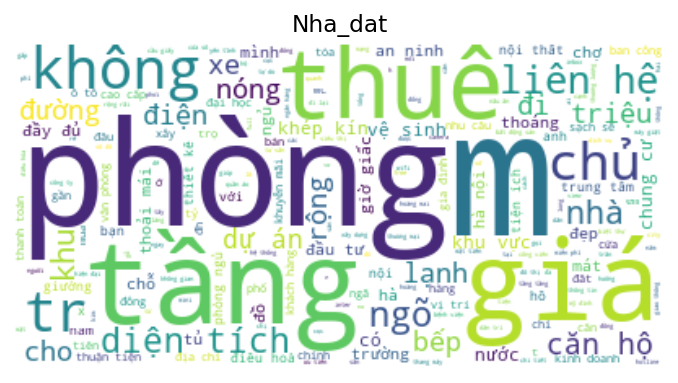

<Figure size 1000x1000 with 0 Axes>

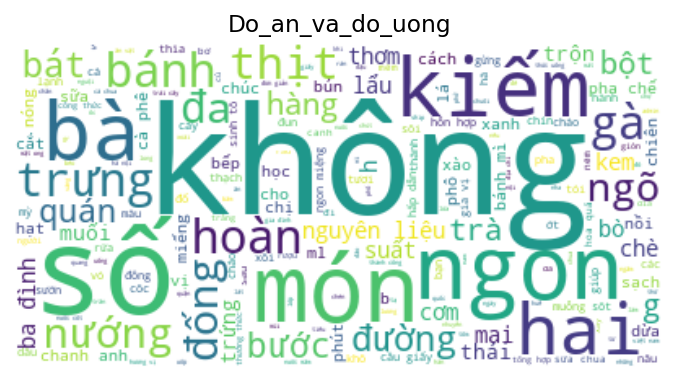

<Figure size 1000x1000 with 0 Axes>

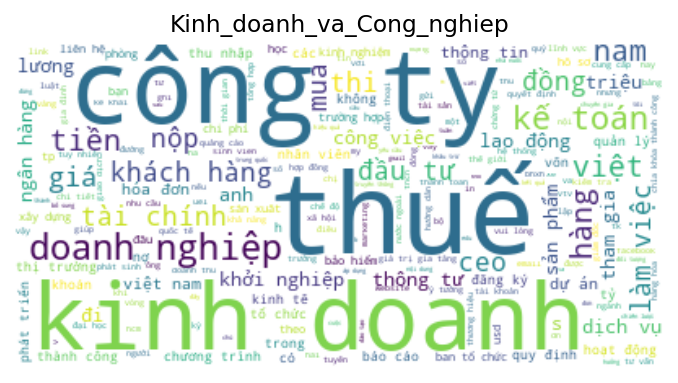

<Figure size 1000x1000 with 0 Axes>

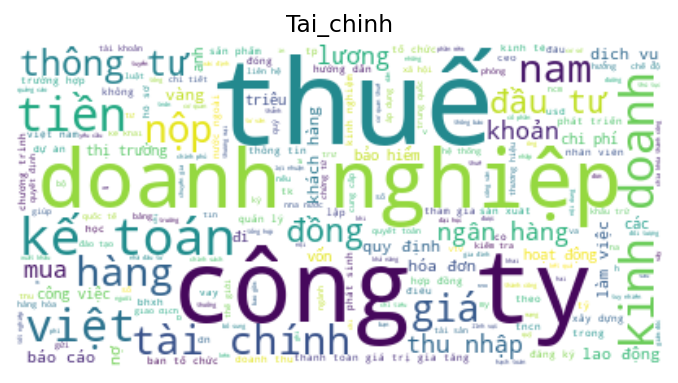

<Figure size 1000x1000 with 0 Axes>

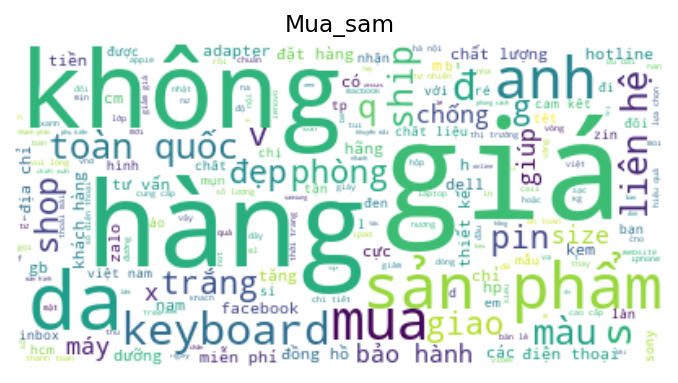

<Figure size 1000x1000 with 0 Axes>

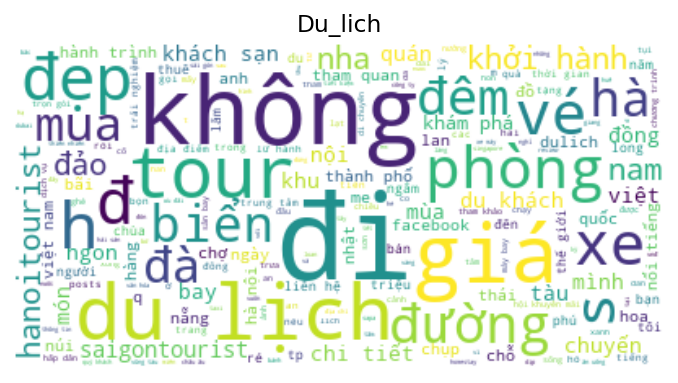

<Figure size 1000x1000 with 0 Axes>

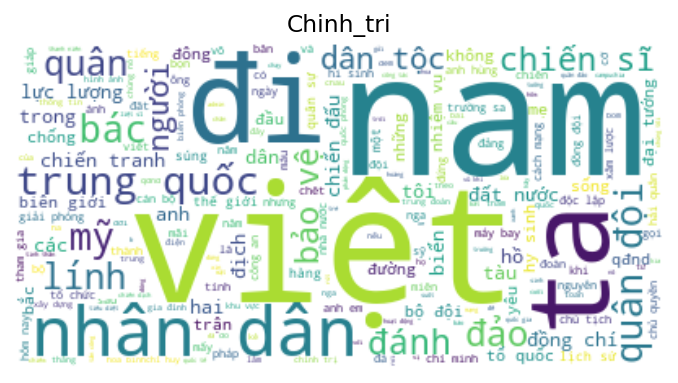

<Figure size 1000x1000 with 0 Axes>

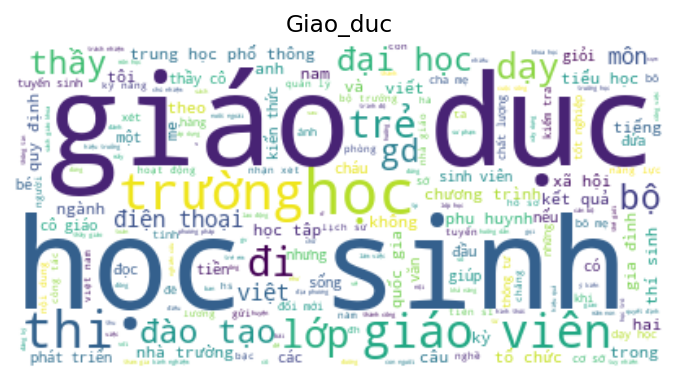

<Figure size 1000x1000 with 0 Axes>

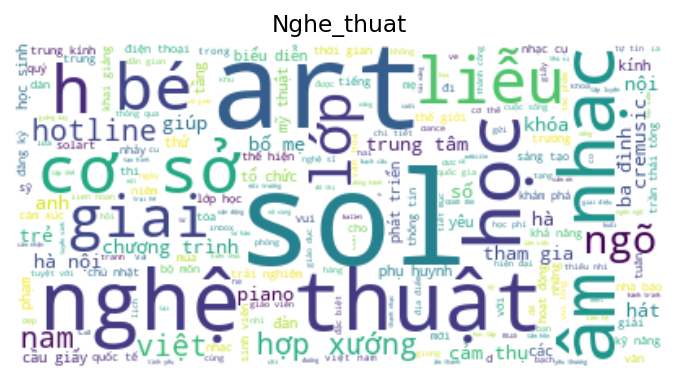

<Figure size 1000x1000 with 0 Axes>

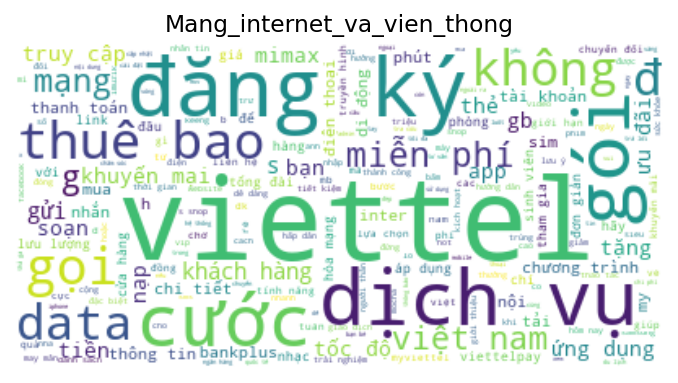

<Figure size 1000x1000 with 0 Axes>

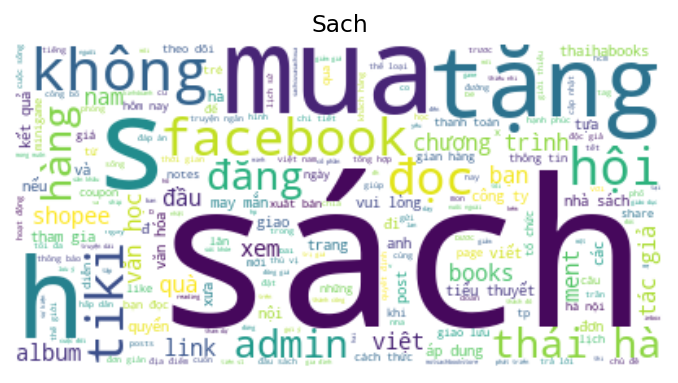

<Figure size 1000x1000 with 0 Axes>

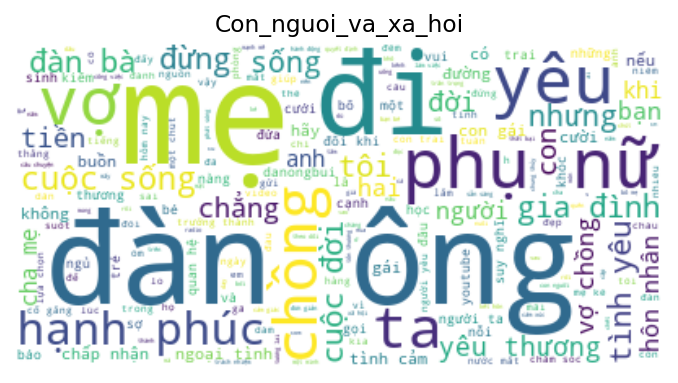

<Figure size 1000x1000 with 0 Axes>

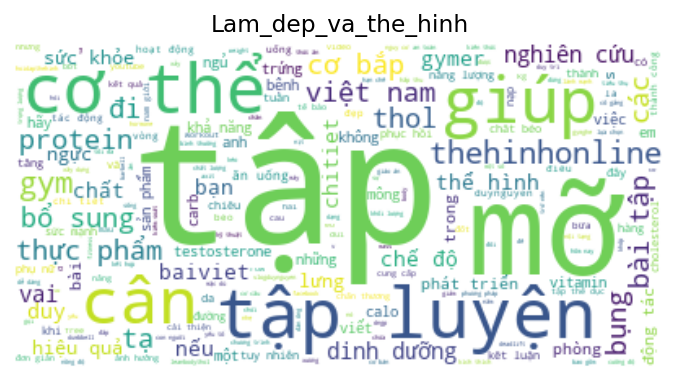

<Figure size 1000x1000 with 0 Axes>

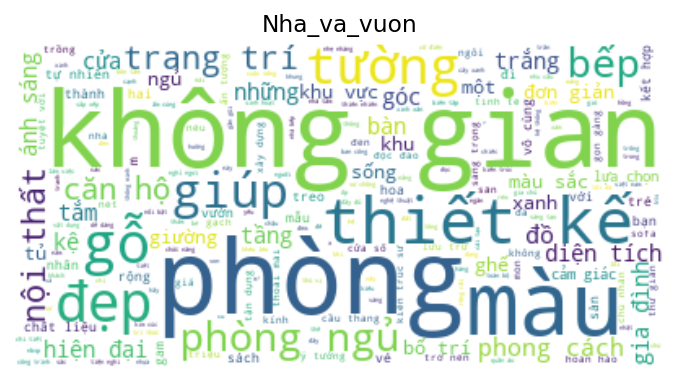

<Figure size 1000x1000 with 0 Axes>

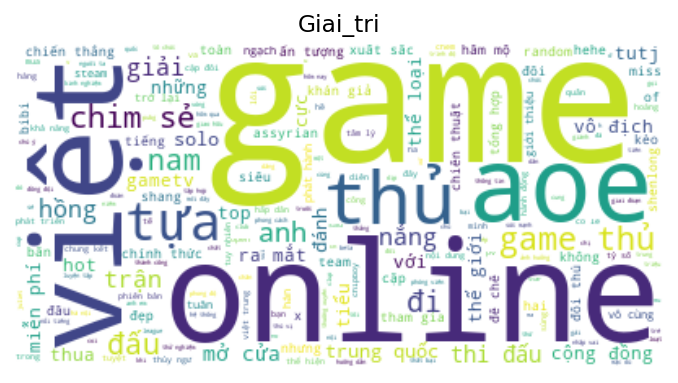

<Figure size 1000x1000 with 0 Axes>

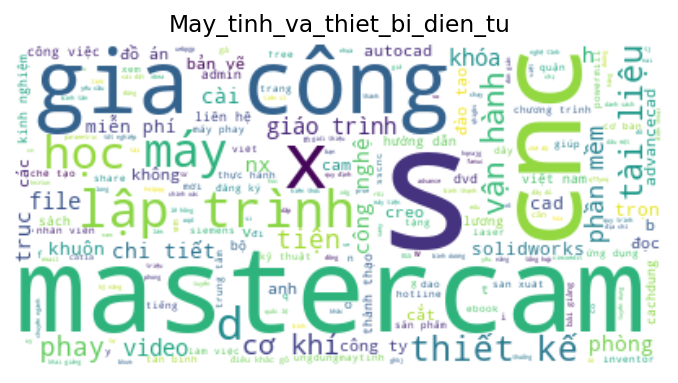

<Figure size 1000x1000 with 0 Axes>

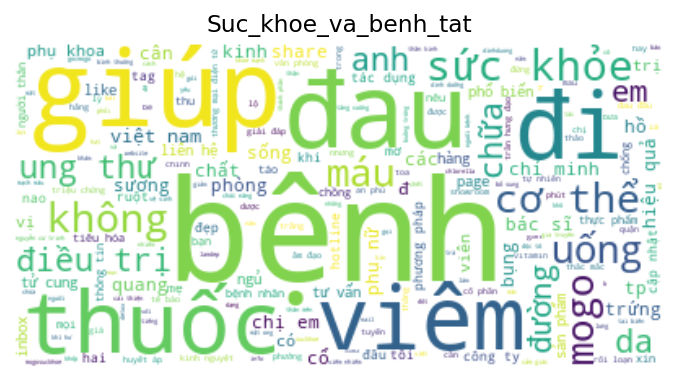

<Figure size 1000x1000 with 0 Axes>

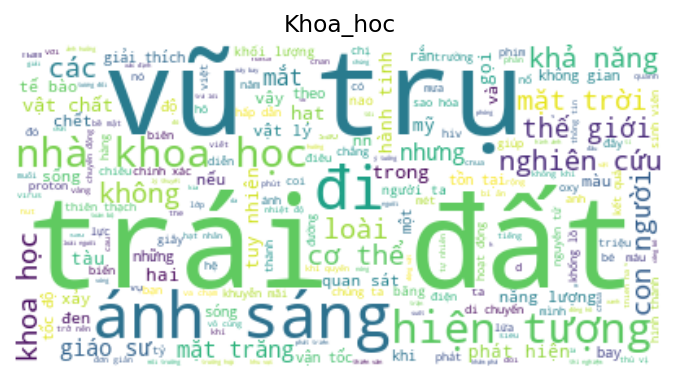

<Figure size 1000x1000 with 0 Axes>

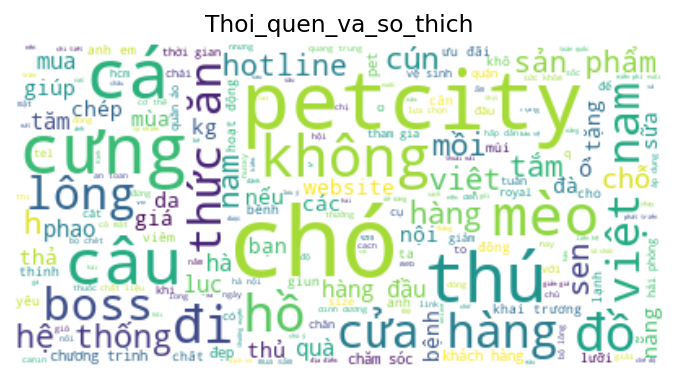

<Figure size 1000x1000 with 0 Axes>

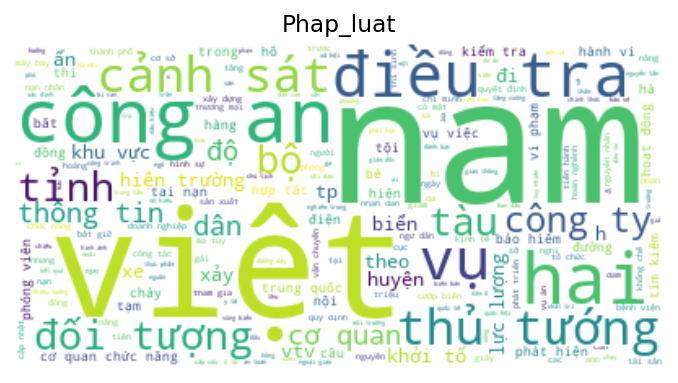

<Figure size 1000x1000 with 0 Axes>

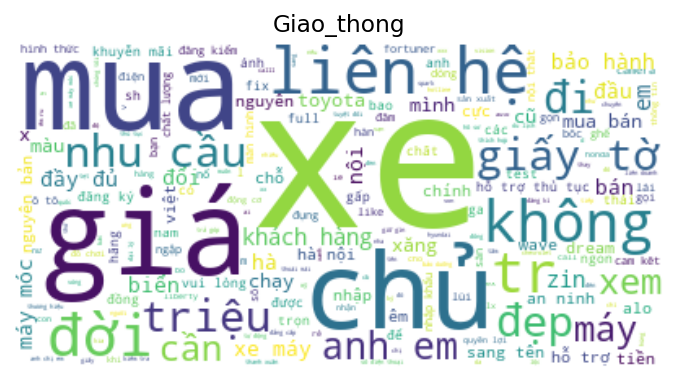

<Figure size 1000x1000 with 0 Axes>

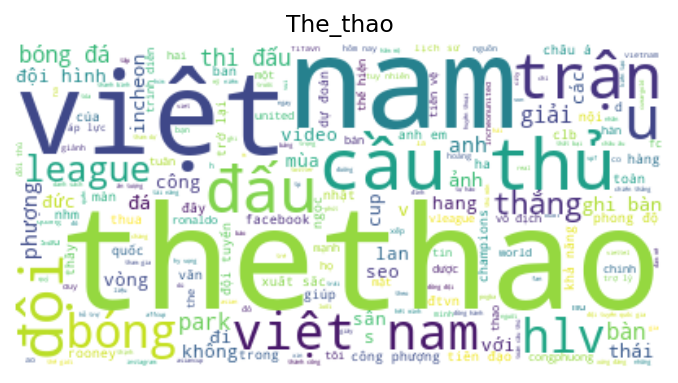

<Figure size 1000x1000 with 0 Axes>

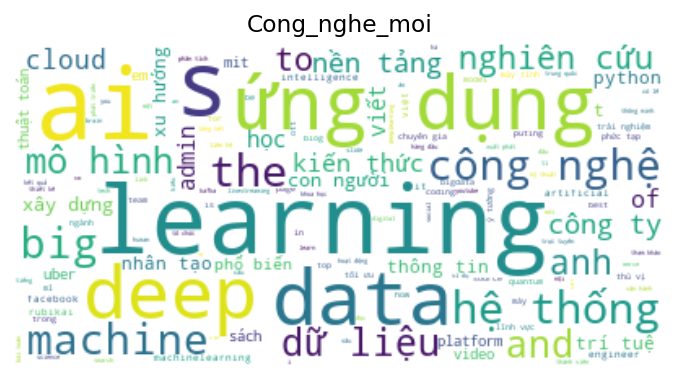

<Figure size 1000x1000 with 0 Axes>

In [ ]:
from wordcloud import WordCloud
from collections import Counter
for label in sorted_label.index:
    label_token_list = []
    label_df = df[df.label == label]

    for token_list in label_df.token:
        label_token_list = label_token_list + token_list

    word_could_dict = Counter(label_token_list)

    word_cloud = WordCloud(collocations = False, background_color = 'white').generate_from_frequencies(word_could_dict)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(label)
    plt.figure(figsize=(5, 5), dpi=200)
    plt.savefig(f'/content/drive/MyDrive/Khai phá + MXH/Khai phá dữ liệu/WordCloud/{label}.png', bbox_inches='tight')
    plt.show()

#### Kiểm tra giá trị `text`

Kiểm tra thử 1 giá trị `text` bất kỳ, có thể thấy nội dung chứa nhiều kí tự gây nhiễu như biểu tượng, kí tự thừa.

In [ ]:
df['text'].iloc[4]

'► Crumpler jackpack full photo ► giá : 800.000 vnđ giảm 20 % còn : 650.000 vnđ ► Đựng vừa laptop 15 " ► Màu sắc : Như Hình ► Cân nặng 1,2 kg ► Kích thước ba lô 28.0 x 45.0 x 14.5 ► Tải trọng tối đa 17 kg ► Chất liệu vải 420d chống thấm tuyết đổi của crumpler ► Ba lô có 1 ngăn chống sock để vừa laptop 15 " có 1 ngăn riêng được thiết kể 1 cái hộp riing để chống sock cho máy ảnh , lens ba lô có thể để vừa 2 body và 1 lens 700/200 và 4 lens tần trung ► Các đầu khóa kéo chắc chắn , có in logo độc quyền Crumpler ► Ngăn trước có nhiều ngăn nhỏ bên trong , ngăn sau đựng laptop có mút PU dày chống sốc ► Mặt sau có lớp mút Ari Mesh dày , thoát hơi nhanh , được thiết kế theo thể hình người Việt Nam ► Quai xách tay va quai đeo ôm sát vai làm cho tải trọng balo được chia đều cho cả lưng , vì vậy người mang cảm thấy rất nhẹ nhàng ► BẢO HÀNH : 1 năm tại BALOHPHUOT.COM ► Chi tiêt liên hệ : www.balophuot.com ►đt : 0903976688 hoặc 01266279279\r\n'

Kiểm tra toàn bộ `text`, **độ dài trung bình** của văn bản là `1356` kí tự, **độ lệch chuẩn** là `1778`, **văn bản ngắn nhất** dài `23` kí tự, **dài nhất** là `36421` kí tự.

count    16000.000000
mean      1356.276000
std       1779.904189
min         23.000000
25%        424.000000
50%        798.000000
75%       1565.000000
max      36421.000000
Name: text_length, dtype: float64


Text(0, 0.5, 'text_length')

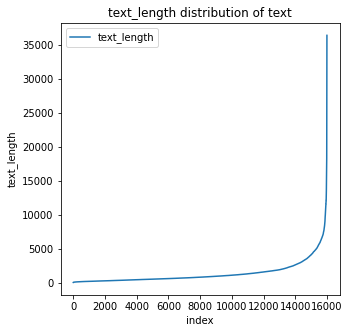

In [ ]:
temp_df = df.copy()
text_len = []
for item in temp_df['text'].values:
    text_len.append(len(item))

temp_df['text_length'] = text_len
print(temp_df['text_length'].describe())
to_chart = temp_df['text_length']
to_chart = to_chart.to_frame()
to_chart = to_chart.sort_values(by='text_length', ignore_index=True)
to_chart.plot(y='text_length',
              title='text_length distribution of text', figsize=(5, 5))
plt.xlabel('index')
plt.ylabel('text_length')

In [ ]:
# Khảo sát từ theo từng label
temp_describe_words_each_label =  df[['label', 'count_words']].groupby(['label']).agg(
    sum_words=pd.NamedAgg(column='count_words', aggfunc=sum), # lấy tổng số từ
    Mean_words=pd.NamedAgg(column='count_words', aggfunc=np.mean), # lấy số từ trung bình 
    std_words=pd.NamedAgg(column='count_words', aggfunc=np.std), # lấy độ lệch chuẩn số từ
    max_words=pd.NamedAgg(column='count_words', aggfunc=np.max), # số từ nhiều nhất
    min_words=pd.NamedAgg(column='count_words', aggfunc=np.min) # từ ngắn nhất
)
temp_describe_words_each_label = temp_describe_words_each_label.reset_index()
temp_describe_words_each_label = temp_describe_words_each_label.sort_values(by='sum_words', ascending=False)
temp_describe_words_each_label


label  sum_words  ...  max_words  min_words
9      Kinh_doanh_va_Cong_nghiep    2523003  ...      21089         60
3               Do_an_va_do_uong    1614616  ...       4662         21
20                     Tai_chinh    1589490  ...      21089         50
6                       Giao_duc    1501806  ...      15803         23
4                        Du_lich    1135577  ...      21358         44
15                       Nha_dat    1029618  ...       3707         35
13                       Mua_sam     660654  ...      19158         11
0                      Chinh_tri     647295  ...      15519         28
14                    Nghe_thuat     449634  ...       6390         67
16                   Nha_va_vuon     407201  ...       4993         46
18                          Sach     292373  ...       3146        116
10           Lam_dep_va_the_hinh     286749  ...      10814         31
11   Mang_internet_va_vien_thong     195300  ...       1532         53
8                       Khoa_hoc     188274  ...       7604         68
19          Suc_khoe_va_benh_tat     139078  ...       7158         92
1            Con_nguoi_va_xa_hoi     129315  ...       3910         28
22         Thoi_quen_va_so_thich     120549  ...       6526         31
12  May_tinh_va_thiet_bi_dien_tu      97347  ...       3750         32
5                       Giai_tri      77199  ...       5699         73
17                     Phap_luat      69103  ...       8705         46
21                      The_thao      24705  ...       1107         36
7                     Giao_thong      24532  ...       1051         13
2                  Cong_nghe_moi      11562  ...       1265         88

[23 rows x 6 columns]

Kiểm tra phân phối số kí tự đối với mỗi `label`
Toàn bộ dữ liệu đều lệch phải

Quá trình lựa chọn Model được lựa chọn dựa theo [Step 2.5: Choose a Model](https://developers.google.com/machine-learning/guides/text-classification/step-2-5 "Step 2.5: Choose a Model")

#### Thuật toán chuẩn bị dữ liệu và xây dựng mô hình


    1. Calculate the number of samples/number of words per sample ratio.
    2. If this ratio is less than 1500, tokenize the text as n-grams and use a
    simple multi-layer perceptron (MLP) model to classify them (left branch in the
    flowchart below):
      a. Split the samples into word n-grams; convert the n-grams into vectors.
      b. Score the importance of the vectors and then select the top 20K using the scores.
      c. Build an MLP model.
    3. If the ratio is greater than 1500, tokenize the text as sequences and use a
       sepCNN model to classify them (right branch in the flowchart below):
      a. Split the samples into words; select the top 20K words based on their frequency.
      b. Convert the samples into word sequence vectors.
      c. If the original number of samples/number of words per sample ratio is less
         than 15K, using a fine-tuned pre-trained embedding with the sepCNN
         model will likely provide the best results.
    4. Measure the model performance with different hyperparameter values to find
       the best model configuration for the dataset.

In [ ]:
print("Số lượng samples: ", df.label.count(), "\nSố lượng từ trung bình: ", df.count_words.mean(), '\nTỉ lệ: ', 16000/836)

Số lượng samples:  16000 
Số lượng từ trung bình:  825.93625 
Tỉ lệ:  19.138755980861244


Với Dataset như trên, tỉ lệ số lượng sample/số từ mỗi sample ~ 19. 
Vậy nên sẽ tạo MLP model.


## 4. Train model

### Chia dữ liệu
Với tập dữ liệu không đều giữa các label và có một số label dữ liệu là vô cùng ít, Việc chia dữ liệu sẽ sử dụng **K-Fold Cross Validation**. 
Tham khảo tại [K-Fold cross validation, đánh giá model hiệu quả hơn khi có ít dữ liệu](https://www.miai.vn/2021/01/18/k-fold-cross-validation-tuyet-chieu-train-khi-it-du-lieu/ "K-Fold cross validation, đánh giá model hiệu quả hơn khi có ít dữ liệu")
Và để đảm bảo tỉ lệ các label trong các fold là tương đồng, bài làm sẽ sử dụng **Stratified K-Fold CV**.
Việc chia dữ liệu sẽ theo tỉ lệ: Train: 67%, Test 33%

In [9]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split
from collections import Counter

#### Chuyển dữ liệu về dạng số

Để train và kiểm tra model cần chia tập dữ liệu làm 2 tập train set và validation set.

Tập train set sẽ gồm 2 tập X_train và y_train, trong đó X_train chứa text đã lọc ở trên, y_label chứa các label với mỗi text tương ứng. Tuy nhiên, các label cần được chuyển về dạng số (numberic) trước khi đưa vào model.

In [10]:
# chuyển label về dạng số (numberic)
label_list = df.label.unique() # lấy danh sách label
label_list = np.sort(label_list) # sắp xếp lại danh sách label
label_dict = {}
# vòng lặp gán label với mỗi giá trị tương ứng liên tiếp
for i in range(0, len(label_list)):
    label_dict[label_list[i]] = i

num_label = []
for label in df['label'].values:
    num_label.append(label_dict[label])
# thêm label số vào bảng để kiểm tra
df['num_label'] = num_label
df


label  ... num_label
0                        Du_lich  ...         4
1                        Nha_dat  ...        15
2                        Nha_dat  ...        15
3                        Nha_dat  ...        15
4                        Mua_sam  ...        13
...                          ...  ...       ...
15995           Do_an_va_do_uong  ...         3
15996                    Nha_dat  ...        15
15997  Kinh_doanh_va_Cong_nghiep  ...         9
15998                Nha_va_vuon  ...        16
15999  Kinh_doanh_va_Cong_nghiep  ...         9

[16000 rows x 5 columns]

#### Chia train : val = 2 : 1
Bài toán là phân loại văn bản, nên tỉ lệ chia dữ liệu train và validation theo mỗi label cần giống nhau. 
Tham khảo tại: [Train-Test Split for Evaluating Machine Learning Algorithms](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/)

In [11]:
# chia tập dữ liệu
X = df.cleaned_text.to_numpy()
y = df['num_label'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(10720,) (5280,) (10720,) (5280,)


### Vector hóa

Văn bản cũng cần đưa về dạng N-grams vector, tham khảo thêm tại [N-gram vectors](https://developers.google.com/machine-learning/guides/text-classification/step-3#n-gram_vectors_option_a)

Để hiểu được N-gram vector cần hiểu về tokenization và vectorization.

Việc sử dụng N-gram sẽ bỏ qua mặt cấu trúc ngữ pháp hay thứ tự từ, đây là cách tiếp cận bag-of-word. Việc tiếp cận này sẽ phù hợp với những model không xét tới thứ tự từ.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Vectorization parameters
# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = (1, 2) # Sẽ chia từ thành unigram và bigram ~ từ 1 chữ và từ 2 chữ

# Limit on the number of features. We use the top 20K features.
TOP_K = 20000

# Whether text should be split into word or character n-grams.
# One of 'word', 'char'.
TOKEN_MODE = 'word'

# Minimum document/corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 2

def dummy_fun(doc):
    return doc

def ngram_vectorize(train_texts, train_labels, val_texts):
    """Vectorizes texts as n-gram vectors.

    1 text = 1 tf-idf vector the length of vocabulary of unigrams + bigrams.

    # Arguments
        train_texts: list, training text strings.
        train_labels: np.ndarray, training labels.
        val_texts: list, validation text strings.

    # Returns
        x_train, x_val: vectorized training and validation texts
    """
    # Create keyword arguments to pass to the 'tf-idf' vectorizer.
    # kwargs = {
    #         analyzer='word',
    #         tokenizer=dummy_fun,
    #         preprocessor=dummy_fun,
    #         token_pattern=None
    #         'dtype': 'int32',
    #         'strip_accents': 'unicode',
    #         'decode_error': 'replace',
    #         'analyzer': TOKEN_MODE,  # Split text into word tokens.
    #         'min_df': MIN_DOCUMENT_FREQUENCY,
            
    # }
    vectorizer = TfidfVectorizer(analyzer='word',
                                tokenizer=dummy_fun,
                                preprocessor=dummy_fun,
                                token_pattern=None,
                                dtype = 'int32') # Thuật toán vector hóa từ

    # Learn vocabulary from training texts and vectorize training texts.
    x_train = vectorizer.fit_transform(train_texts)
    # Vectorize validation texts.
    x_val = vectorizer.transform(val_texts)

    # Select top 'k' of the vectorized features.
    selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
    selector.fit(x_train, train_labels)
    x_train = selector.transform(x_train).astype('float32')
    x_val = selector.transform(x_val).astype('float32')
    return x_train, x_val


### Huấn luyện model


In [13]:
def _get_last_layer_units_and_activation(num_classes):
    """Gets the # units and activation function for the last network layer.

    # Arguments
        num_classes: int, number of classes.

    # Returns
        units, activation values.
    """
    if num_classes == 2:
        activation = 'sigmoid'
        units = 1
    else:
        activation = 'softmax'
        units = num_classes
    return units, activation

In [14]:
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
import tensorflow as tf

def mlp_model(layers, units, dropout_rate, input_shape, num_classes):
    """Creates an instance of a multi-layer perceptron model.

    # Arguments
        layers: int, number of `Dense` layers in the model.
        units: int, output dimension of the layers.
        dropout_rate: float, percentage of input to drop at Dropout layers.
        input_shape: tuple, shape of input to the model.
        num_classes: int, number of output classes.

    # Returns
        An MLP model instance.
    """
    op_units, op_activation = _get_last_layer_units_and_activation(num_classes)
    model = models.Sequential()
    model.add(Dropout(rate=dropout_rate, input_shape=input_shape))

    for _ in range(layers-1):
        model.add(Dense(units=units, activation='relu'))
        model.add(Dropout(rate=dropout_rate))

    model.add(Dense(units=op_units, activation=op_activation))
    return model

In [15]:
def get_num_classes(labels):
    """Gets the total number of classes.
    # Arguments
        labels: list, label values.
            There should be at lease one sample for values in the
            range (0, num_classes -1)
    # Returns
        int, total number of classes.
    # Raises
        ValueError: if any label value in the range(0, num_classes - 1)
            is missing or if number of classes is <= 1.
    """
    num_classes = max(labels) + 1
    missing_classes = [i for i in range(num_classes) if i not in labels]
    if len(missing_classes):
        raise ValueError('Missing samples with label value(s) '
                         '{missing_classes}. Please make sure you have '
                         'at least one sample for every label value '
                         'in the range(0, {max_class})'.format(
                            missing_classes=missing_classes,
                            max_class=num_classes - 1))

    if num_classes <= 1:
        raise ValueError('Invalid number of labels: {num_classes}.'
                         'Please make sure there are at least two classes '
                         'of samples'.format(num_classes=num_classes))
    return num_classes

In [66]:
MODEL_PATH = '/content/drive/MyDrive/Khai phá + MXH/Khai phá dữ liệu/Models/'
UNOVERSAMPLING_MODEL_PATH = '/content/drive/MyDrive/Khai phá + MXH/Khai phá dữ liệu/Models/unoversampling_model_0.1'
OVERSAMPLING_MODEL_PATH = '/content/drive/MyDrive/Khai phá + MXH/Khai phá dữ liệu/Models/oversampling_model_0.1'
CUSTOM_TOKENIZE_MODEL_PATH = '/content/drive/MyDrive/Khai phá + MXH/Khai phá dữ liệu/Models/custom_tokenize_0.1'
SMOTE_MODEL_PATH = '/content/drive/MyDrive/Khai phá + MXH/Khai phá dữ liệu/Models/SMOTE_0.1'
SMOTE_ALL_1_MODEL_PATH = '/content/drive/MyDrive/Khai phá + MXH/Khai phá dữ liệu/Models/SMOTE__border_line_1'
SMOTE_ALL_2_MODEL_PATH = '/content/drive/MyDrive/Khai phá + MXH/Khai phá dữ liệu/Models/SMOTE__border_line_2'
SMOTE_ALL_2_MODEL_PATH_2 = '/content/drive/MyDrive/Khai phá + MXH/Khai phá dữ liệu/Models/SMOTE__border_line_2_2.0'

In [67]:
from tensorflow.python.keras.optimizer_v2.adam import Adam
from matplotlib import pyplot
from imblearn.over_sampling import BorderlineSMOTE 

def train_ngram_model(data,
                      learning_rate=1e-3,
                      epochs=500,
                      batch_size=128,
                      layers=2,
                      units=32,
                      dropout_rate=0.2):
    """Trains n-gram model on the given dataset.

    # Arguments
        data: tuples of training and test texts and labels.
        learning_rate: float, learning rate for training model.
        epochs: int, number of epochs.
        batch_size: int, number of samples per batch.
        layers: int, number of `Dense` layers in the model.
        units: int, output dimension of Dense layers in the model.
        dropout_rate: float: percentage of input to drop at Dropout layers.

    # Raises
        ValueError: If validation data has label values which were not seen
            in the training data.
    """
    # Get the data.
    (train_texts, train_labels), (val_texts, val_labels) = data

    # Verify that validation labels are in the same range as training labels.
    num_classes = get_num_classes(train_labels)
    unexpected_labels = [v for v in val_labels if v not in range(num_classes)]
    if len(unexpected_labels):
        raise ValueError('Unexpected label values found in the validation set:'
                         ' {unexpected_labels}. Please make sure that the '
                         'labels in the validation set are in the same range '
                         'as training labels.'.format(
                             unexpected_labels=unexpected_labels))

    # Vectorize texts.
    print(Counter(train_labels))
    over_sampling = BorderlineSMOTE(sampling_strategy='all', kind='borderline-2')
    x_train, x_val = ngram_vectorize(
        train_texts, train_labels, val_texts)
    x_train = x_train.todense()
    x_val = x_val.todense()
    print(x_train.shape)
    
    x_train, train_labels = over_sampling.fit_resample(x_train, train_labels)
    print(Counter(train_labels))
    
    # Create model instance.
    model = mlp_model(layers=layers,
                                  units=units,
                                  dropout_rate=dropout_rate,
                                  input_shape=x_train.shape[1:],
                                  num_classes=num_classes)

    # Compile model with learning parameters.
    if num_classes == 2:
        loss = 'binary_crossentropy'
    else:
        loss = 'sparse_categorical_crossentropy'
    optimizer = Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss=loss, metrics=['acc'])

    # Create callback for early stopping on validation loss. If the loss does
    # not decrease in two consecutive tries, stop training.
    callbacks = [tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=2)]

    # Train and validate model.
    history = model.fit(
            x_train,
            train_labels,
            epochs=epochs,
            callbacks=callbacks,
            validation_data=(x_val, val_labels),
            verbose=2,  # Logs once per epoch.
            batch_size=batch_size)

    # Print results.
    history = history.history

    print('Validation accuracy: {acc}, loss: {loss}'.format(
            acc=history['val_acc'][-1], loss=history['val_loss'][-1]))

    pyplot.plot(history['loss'], label='train')
    pyplot.plot(history['val_loss'], label='test')
    pyplot.legend()
    pyplot.savefig(f'{MODEL_PATH}SMOTE_ALL_2_MODEL_PATH_2.png')
    pyplot.show()

    # Save model.
    model.save(SMOTE_ALL_2_MODEL_PATH_2)
    return history['val_acc'][-1], history['val_loss'][-1]

In [21]:
# chia tập dữ liệu
X = df.token.to_numpy()
y = df['num_label'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(10720,) (5280,) (10720,) (5280,)


#### Train

Counter({15: 1703, 3: 1579, 9: 1579, 20: 924, 13: 783, 4: 590, 0: 533, 6: 467, 14: 408, 11: 397, 18: 278, 1: 259, 10: 190, 16: 176, 5: 142, 12: 135, 19: 130, 8: 107, 22: 107, 17: 88, 7: 72, 21: 51, 2: 22})


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning,


(10720, 20000)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Counter({20: 1703, 8: 1703, 0: 1703, 22: 1703, 9: 1703, 17: 1703, 15: 1703, 4: 1703, 10: 1703, 11: 1703, 7: 1703, 21: 1703, 3: 1702, 13: 1702, 18: 1702, 6: 1702, 1: 1702, 12: 1702, 16: 1702, 19: 1702, 14: 1702, 5: 1702, 2: 1702})
Epoch 1/500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:368: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


306/306 - 13s - loss: 1.7662 - acc: 0.8369 - val_loss: 0.8430 - val_acc: 0.8502
Epoch 2/500
306/306 - 12s - loss: 0.4008 - acc: 0.9335 - val_loss: 0.3995 - val_acc: 0.8705
Epoch 3/500
306/306 - 12s - loss: 0.2210 - acc: 0.9457 - val_loss: 0.3203 - val_acc: 0.8691
Epoch 4/500
306/306 - 12s - loss: 0.1656 - acc: 0.9522 - val_loss: 0.2899 - val_acc: 0.8710
Epoch 5/500
306/306 - 12s - loss: 0.1329 - acc: 0.9589 - val_loss: 0.2664 - val_acc: 0.8746
Epoch 6/500
306/306 - 12s - loss: 0.1132 - acc: 0.9630 - val_loss: 0.2619 - val_acc: 0.8723
Epoch 7/500
306/306 - 12s - loss: 0.1002 - acc: 0.9661 - val_loss: 0.2588 - val_acc: 0.8710
Epoch 8/500
306/306 - 12s - loss: 0.0887 - acc: 0.9694 - val_loss: 0.2594 - val_acc: 0.8706
Epoch 9/500
306/306 - 12s - loss: 0.0805 - acc: 0.9718 - val_loss: 0.2623 - val_acc: 0.8695
Validation accuracy: 0.8695075511932373, loss: 0.26232534646987915


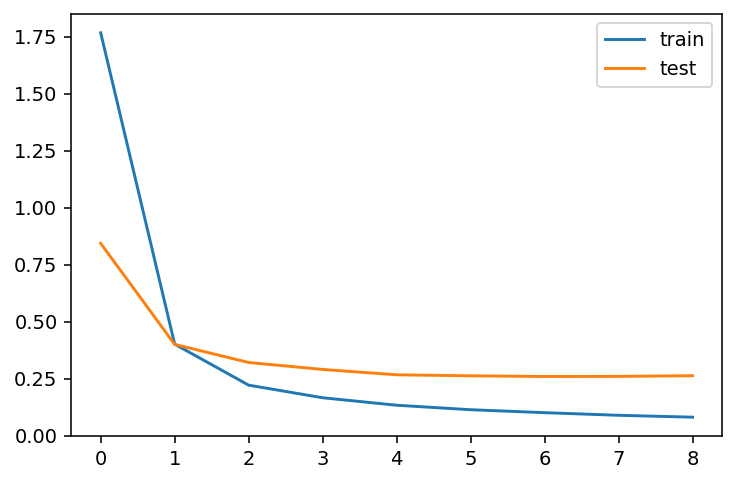

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Khai phá + MXH/Khai phá dữ liệu/Models/SMOTE__border_line_2_2.0/assets


In [68]:
data = (X_train, y_train), (X_test, y_test)
val_acc, val_loss = train_ngram_model(data=data)

## 5. Đánh giá


### Dự đoán với giá trị validate

In [69]:
from tensorflow import keras
model = keras.models.load_model(SMOTE_ALL_2_MODEL_PATH_2)
callbacks = [tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=2)]
batch_size=128
data = (X_train, y_train), (X_test, y_test)
(train_texts, train_labels), (val_texts, val_labels) = data
x_train, x_val = ngram_vectorize(
        train_texts, train_labels, val_texts)
x_train = x_train.todense()
x_val = x_val.todense()


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning,


In [70]:
y_pred = model.predict(
            x_val,
            batch_size=batch_size, 
            verbose=2, 
            steps=None)

y_pred_nol = []
for np_arr in y_pred:
  lst = np_arr.tolist()
  max_value = max(lst)

  max_index = lst.index(max_value)
  y_pred_nol.append(max_index)
  
y_pred_nol = np.array(y_pred_nol)

42/42 - 0s - 397ms/epoch - 9ms/step


### Tính conf matrix


In [56]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [71]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_labels, y_pred_nol)

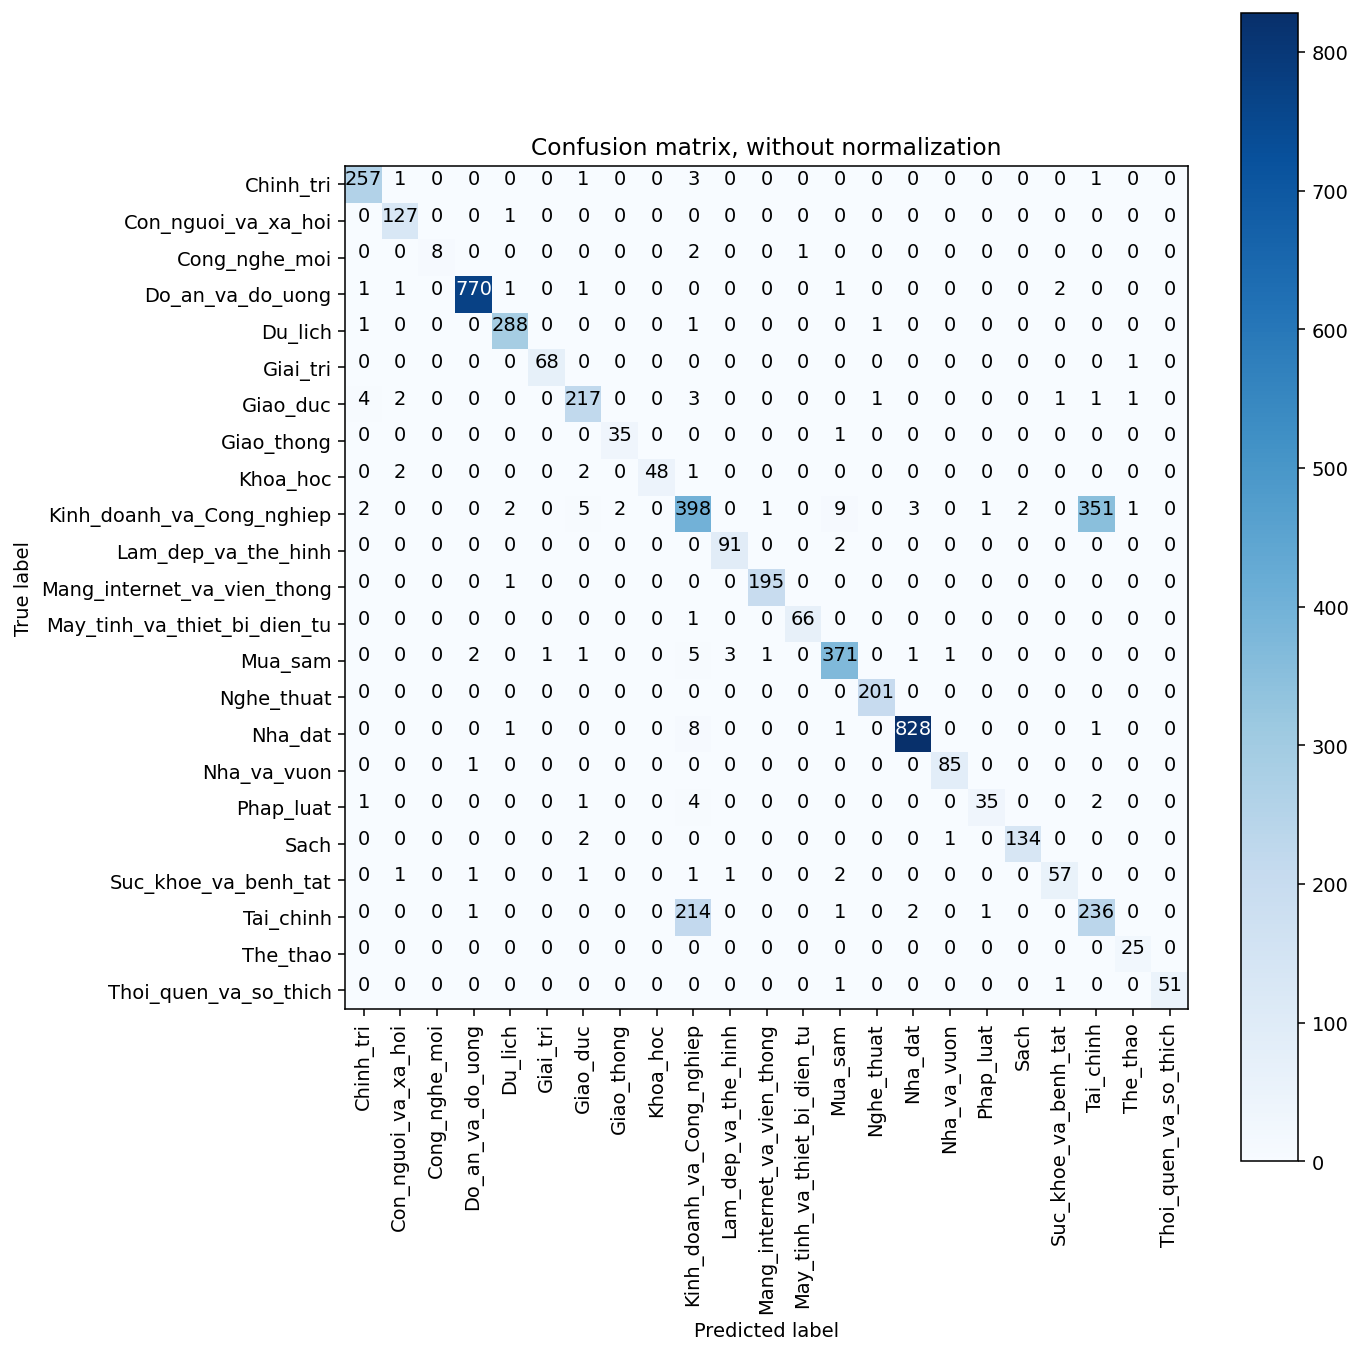

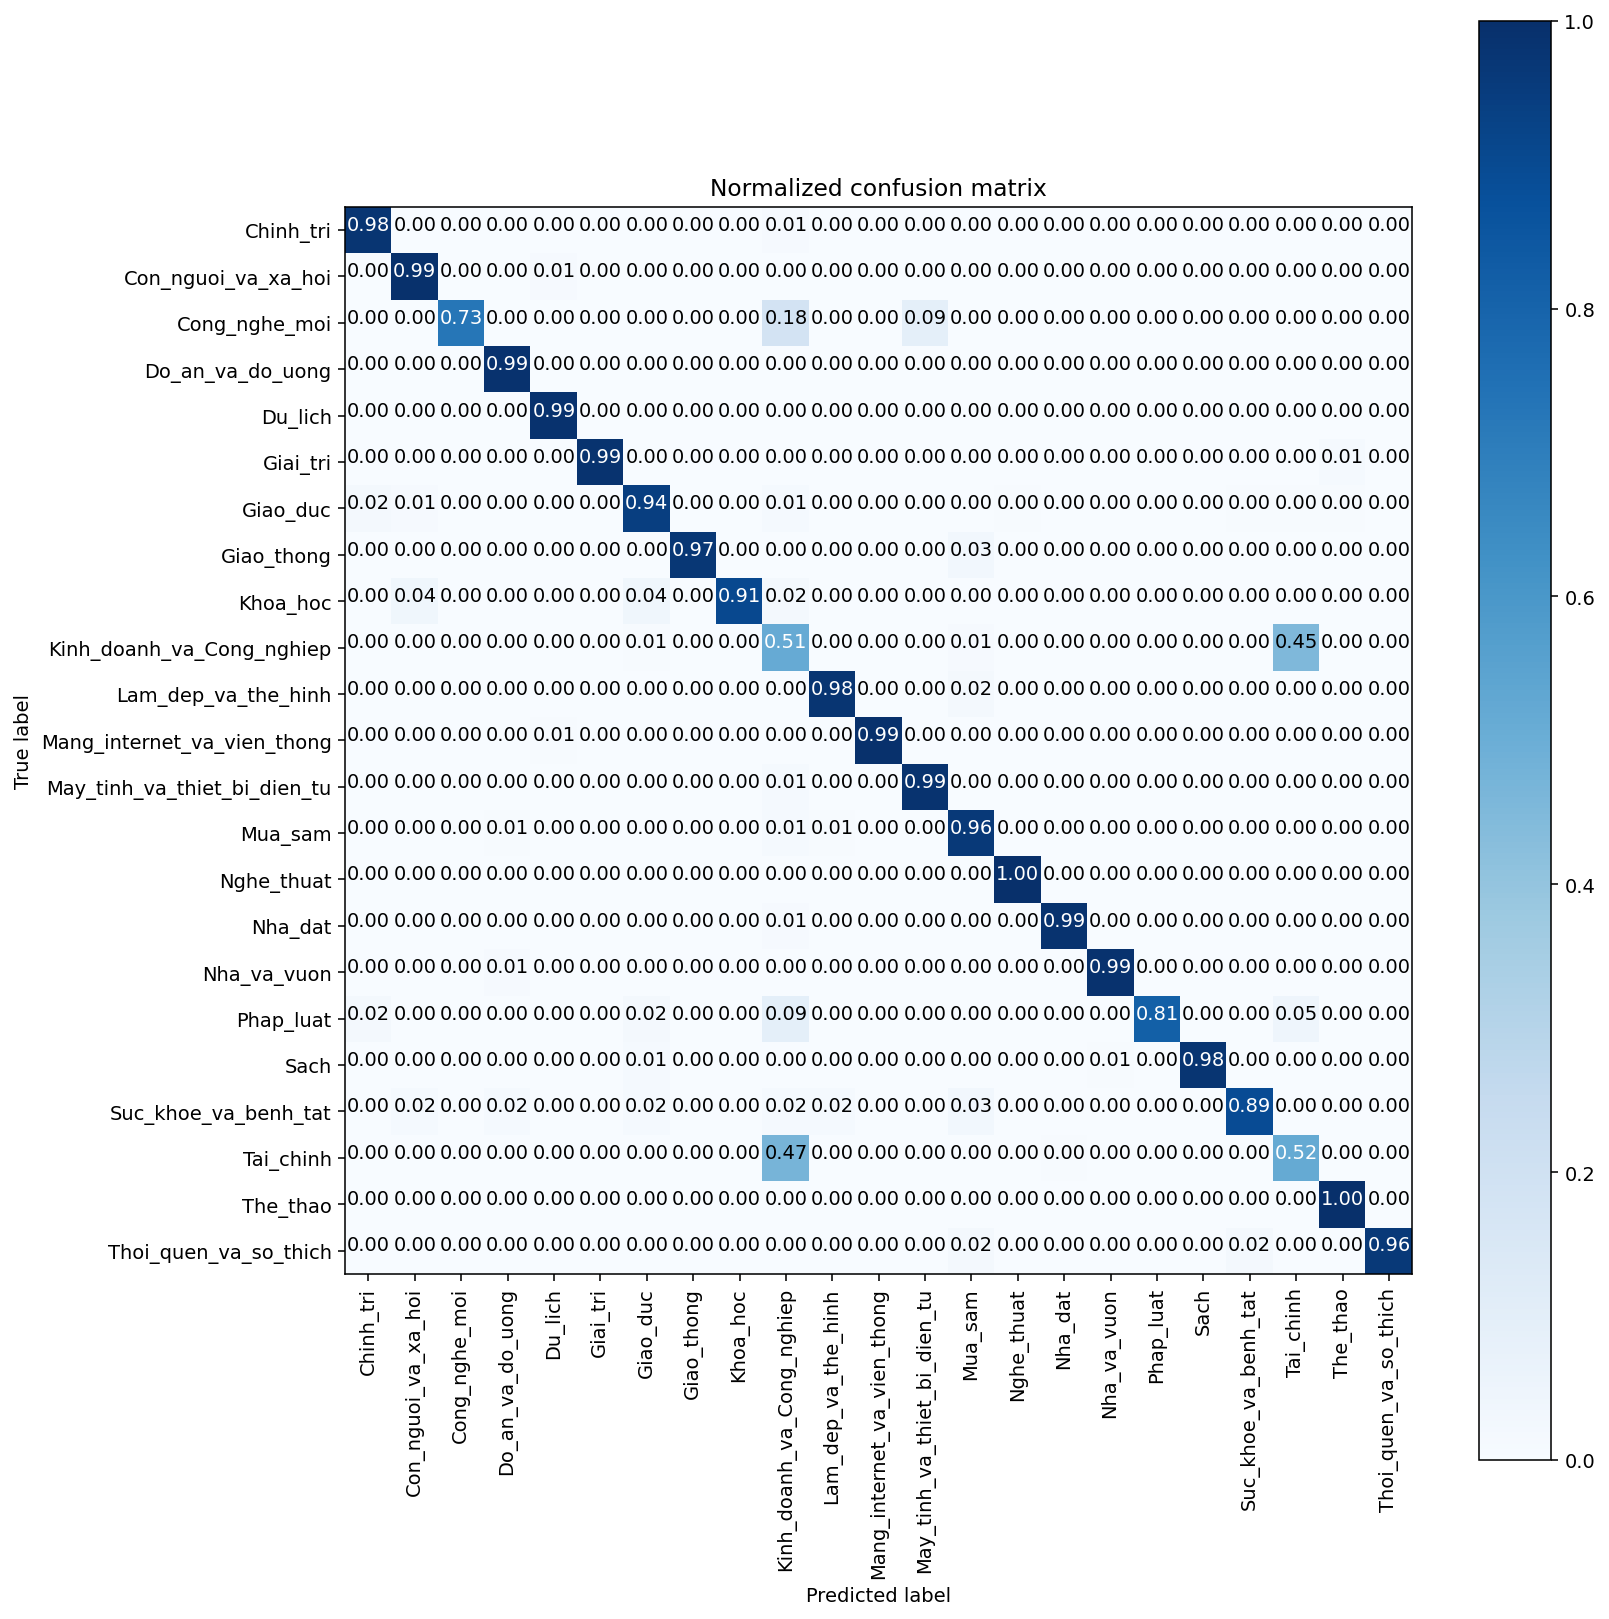

In [72]:
label_list = []
for label, inx in label_dict.items():
  label_list.append(label)
# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=label_dict,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(12, 12))
plot_confusion_matrix(cnf_matrix, classes=label_dict, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig(f'{SMOTE_ALL_2_MODEL_PATH_2}/conf.png')
plt.show()

## 6. Test

### Đọc file test

In [31]:
file = open('/content/drive/MyDrive/Khai phá + MXH/Khai phá dữ liệu/topic_detection_test_unlabel.v1.0.txt', 'r', encoding = 'UTF-8')
comments = []
for line in file:
    comments.append(line)
pred_df = pd.DataFrame()
pred_df['text'] = comments

### Tiền xử lí dữ liệu Test

In [32]:
pred_df['cleaned_text'] = remove_stopwords(pred_df)
cleaned_text = []
for comment in pred_df['cleaned_text'].values:
    comment = re.sub('\W+|http|www|com|COM|HTTP|HTTPS|WWW|net|NET|ORG|org', ' ', comment) # thiếu
    comment = re.sub('[0-9]', ' ', comment)
    comment = re.sub('_', ' ', comment)
    comment = re.sub('(?<=\s) +|^ +(?=\s)', '', comment).strip() # Bỏ các kí tự trắng thừa
    comment = comment.lower()
    # words = word_tokenize(clean_text)
    cleaned_text.append(comment)
    # words = clean_text.split() # tách từ theo mỗi dấu cách => tính số từ
    # word_count.append(len(words))

pred_df['cleaned_text'] = cleaned_text

list_cmt_token = []
cleaned = []
replace_words = ['bitly', 'bit', 'ly', 'google', 'goo', 'gl', 'html']
for cmt in pred_df.cleaned_text:
    for word in replace_words:
        cmt = cmt.replace(word, '')
    cleaned.append(cmt)
    cmt_token = word_tokenize(cmt)
    list_cmt_token.append(cmt_token)
pred_df['token'] = list_cmt_token
pred_df['cleaned_text'] = cleaned

In [ ]:
pred_df

text  ...                                              token
0      ﻿Gấp ; Hiện bên em đang cần thuê 1 phòng có Di...  ...  [gấp, hiện, thuê, phòng, diện tích, m, m, khu ...
1      🌈 CHÀO NOEL ĐÓN MƯA QUÀ TẶNG . 😍 Nhân dịp Noel...  ...  [chào, noel, đón, mưa, quà, tặng, nhân dịp, no...
2      📢📢📢 KHỞI CÔNG XÂY DỰNG 33 CĂN NHÀ PHỐ LIỀN KỀ ...  ...  [khởi công, xây dựng, căn, nhà, phố, liền, kề,...
3      Sáng ngày hôm nay, BTC rất vui khi nhận được s...  ...  [sáng, hôm nay, btc, vui, sách, tài trợ, nhà s...
4      Cần cho thuê căn hộ chung cư dưới sài đồng đối...  ...  [cần, thuê, căn hộ, chung cư, sài đồng, đối di...
...                                                  ...  ...                                                ...
10012  [ TỔNG HỢP NHỮNG MÓN NGON KHU VỰC ĐÀO TẤN - BA...  ...  [tổng hợp, những, món, ngon, khu vực, đào, tấn...
10013  Bản tin tài chính kinh doanh tối thứ sáu (23/0...  ...  [bản tin, tài chính, kinh doanh, tối, thứ sáu,...
10014  Ngang nhiên vừa hack vừa stream, game thủ Over...  ...  [ngang nhiên, hack, stream, game, thủ, overwat...
10015  5 TOUR NƯỚC NGOÀI DỊP GIÁNG SINH, NĂM MỚI GIÁ ...  ...  [tour, nước ngoài, dịp, giáng sinh, năm, mới, ...
10016  nhượng phòng không khép kín ở ngõ 63 xuân thủy...  ...  [nhượng, phòng, khép kín, ngõ, xuân, thủy giá,...

[10017 rows x 3 columns]

In [33]:
cleaned_short_word = []
for token in pred_df['token'].values:
    for short_word in sorted_short_list:
        for i in range(len(token)):
            if token[i] == short_word:
                token[i] = shortform_dict[short_word]
                change += 1
    cleaned_short_word.append(token)
pred_df['token'] = cleaned_short_word

### Dự đoán nhãn cho tập Test

In [73]:
from tensorflow import keras
model = keras.models.load_model(SMOTE_ALL_2_MODEL_PATH_2)
callbacks = [tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=2)]
batch_size=128
data = (X_train, y_train), (pred_df.token.values, y_test)
(train_texts, train_labels), (val_texts, val_labels) = data
x_train, x_val = ngram_vectorize(
        train_texts, train_labels, val_texts)
x_train = x_train.todense()
x_val = x_val.todense()
y_pred = model.predict(
            x_val,
            batch_size=batch_size, 
            verbose=2, 
            steps=None)

y_pred_nol = []
for np_arr in y_pred:
  lst = np_arr.tolist()
  max_value = max(lst)

  max_index = lst.index(max_value)
  y_pred_nol.append(max_index)
  
y_pred_nol = np.array(y_pred_nol)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning,


79/79 - 1s - 674ms/epoch - 9ms/step


In [74]:
label_dict_from_num = {v: k for k, v in label_dict.items()}
label_dict_from_num

{0: 'Chinh_tri',
 1: 'Con_nguoi_va_xa_hoi',
 2: 'Cong_nghe_moi',
 3: 'Do_an_va_do_uong',
 4: 'Du_lich',
 5: 'Giai_tri',
 6: 'Giao_duc',
 7: 'Giao_thong',
 8: 'Khoa_hoc',
 9: 'Kinh_doanh_va_Cong_nghiep',
 10: 'Lam_dep_va_the_hinh',
 11: 'Mang_internet_va_vien_thong',
 12: 'May_tinh_va_thiet_bi_dien_tu',
 13: 'Mua_sam',
 14: 'Nghe_thuat',
 15: 'Nha_dat',
 16: 'Nha_va_vuon',
 17: 'Phap_luat',
 18: 'Sach',
 19: 'Suc_khoe_va_benh_tat',
 20: 'Tai_chinh',
 21: 'The_thao',
 22: 'Thoi_quen_va_so_thich'}

In [75]:
y_pred_to_label = []
for val in y_pred_nol:
    y_pred_to_label.append(label_dict_from_num[val])
pred_df['pred_label'] = y_pred_to_label

In [76]:
pred_df

text  ...                   pred_label
0      ﻿Gấp ; Hiện bên em đang cần thuê 1 phòng có Di...  ...                      Nha_dat
1      🌈 CHÀO NOEL ĐÓN MƯA QUÀ TẶNG . 😍 Nhân dịp Noel...  ...  Mang_internet_va_vien_thong
2      📢📢📢 KHỞI CÔNG XÂY DỰNG 33 CĂN NHÀ PHỐ LIỀN KỀ ...  ...                      Nha_dat
3      Sáng ngày hôm nay, BTC rất vui khi nhận được s...  ...                         Sach
4      Cần cho thuê căn hộ chung cư dưới sài đồng đối...  ...                      Nha_dat
...                                                  ...  ...                          ...
10012  [ TỔNG HỢP NHỮNG MÓN NGON KHU VỰC ĐÀO TẤN - BA...  ...             Do_an_va_do_uong
10013  Bản tin tài chính kinh doanh tối thứ sáu (23/0...  ...    Kinh_doanh_va_Cong_nghiep
10014  Ngang nhiên vừa hack vừa stream, game thủ Over...  ...                     Giai_tri
10015  5 TOUR NƯỚC NGOÀI DỊP GIÁNG SINH, NĂM MỚI GIÁ ...  ...                      Du_lich
10016  nhượng phòng không khép kín ở ngõ 63 xuân thủy...  ...                      Nha_dat

[10017 rows x 4 columns]

### Khảo sát nhãn đã dự đoán, lưu kết quả


number of unique labels:  23


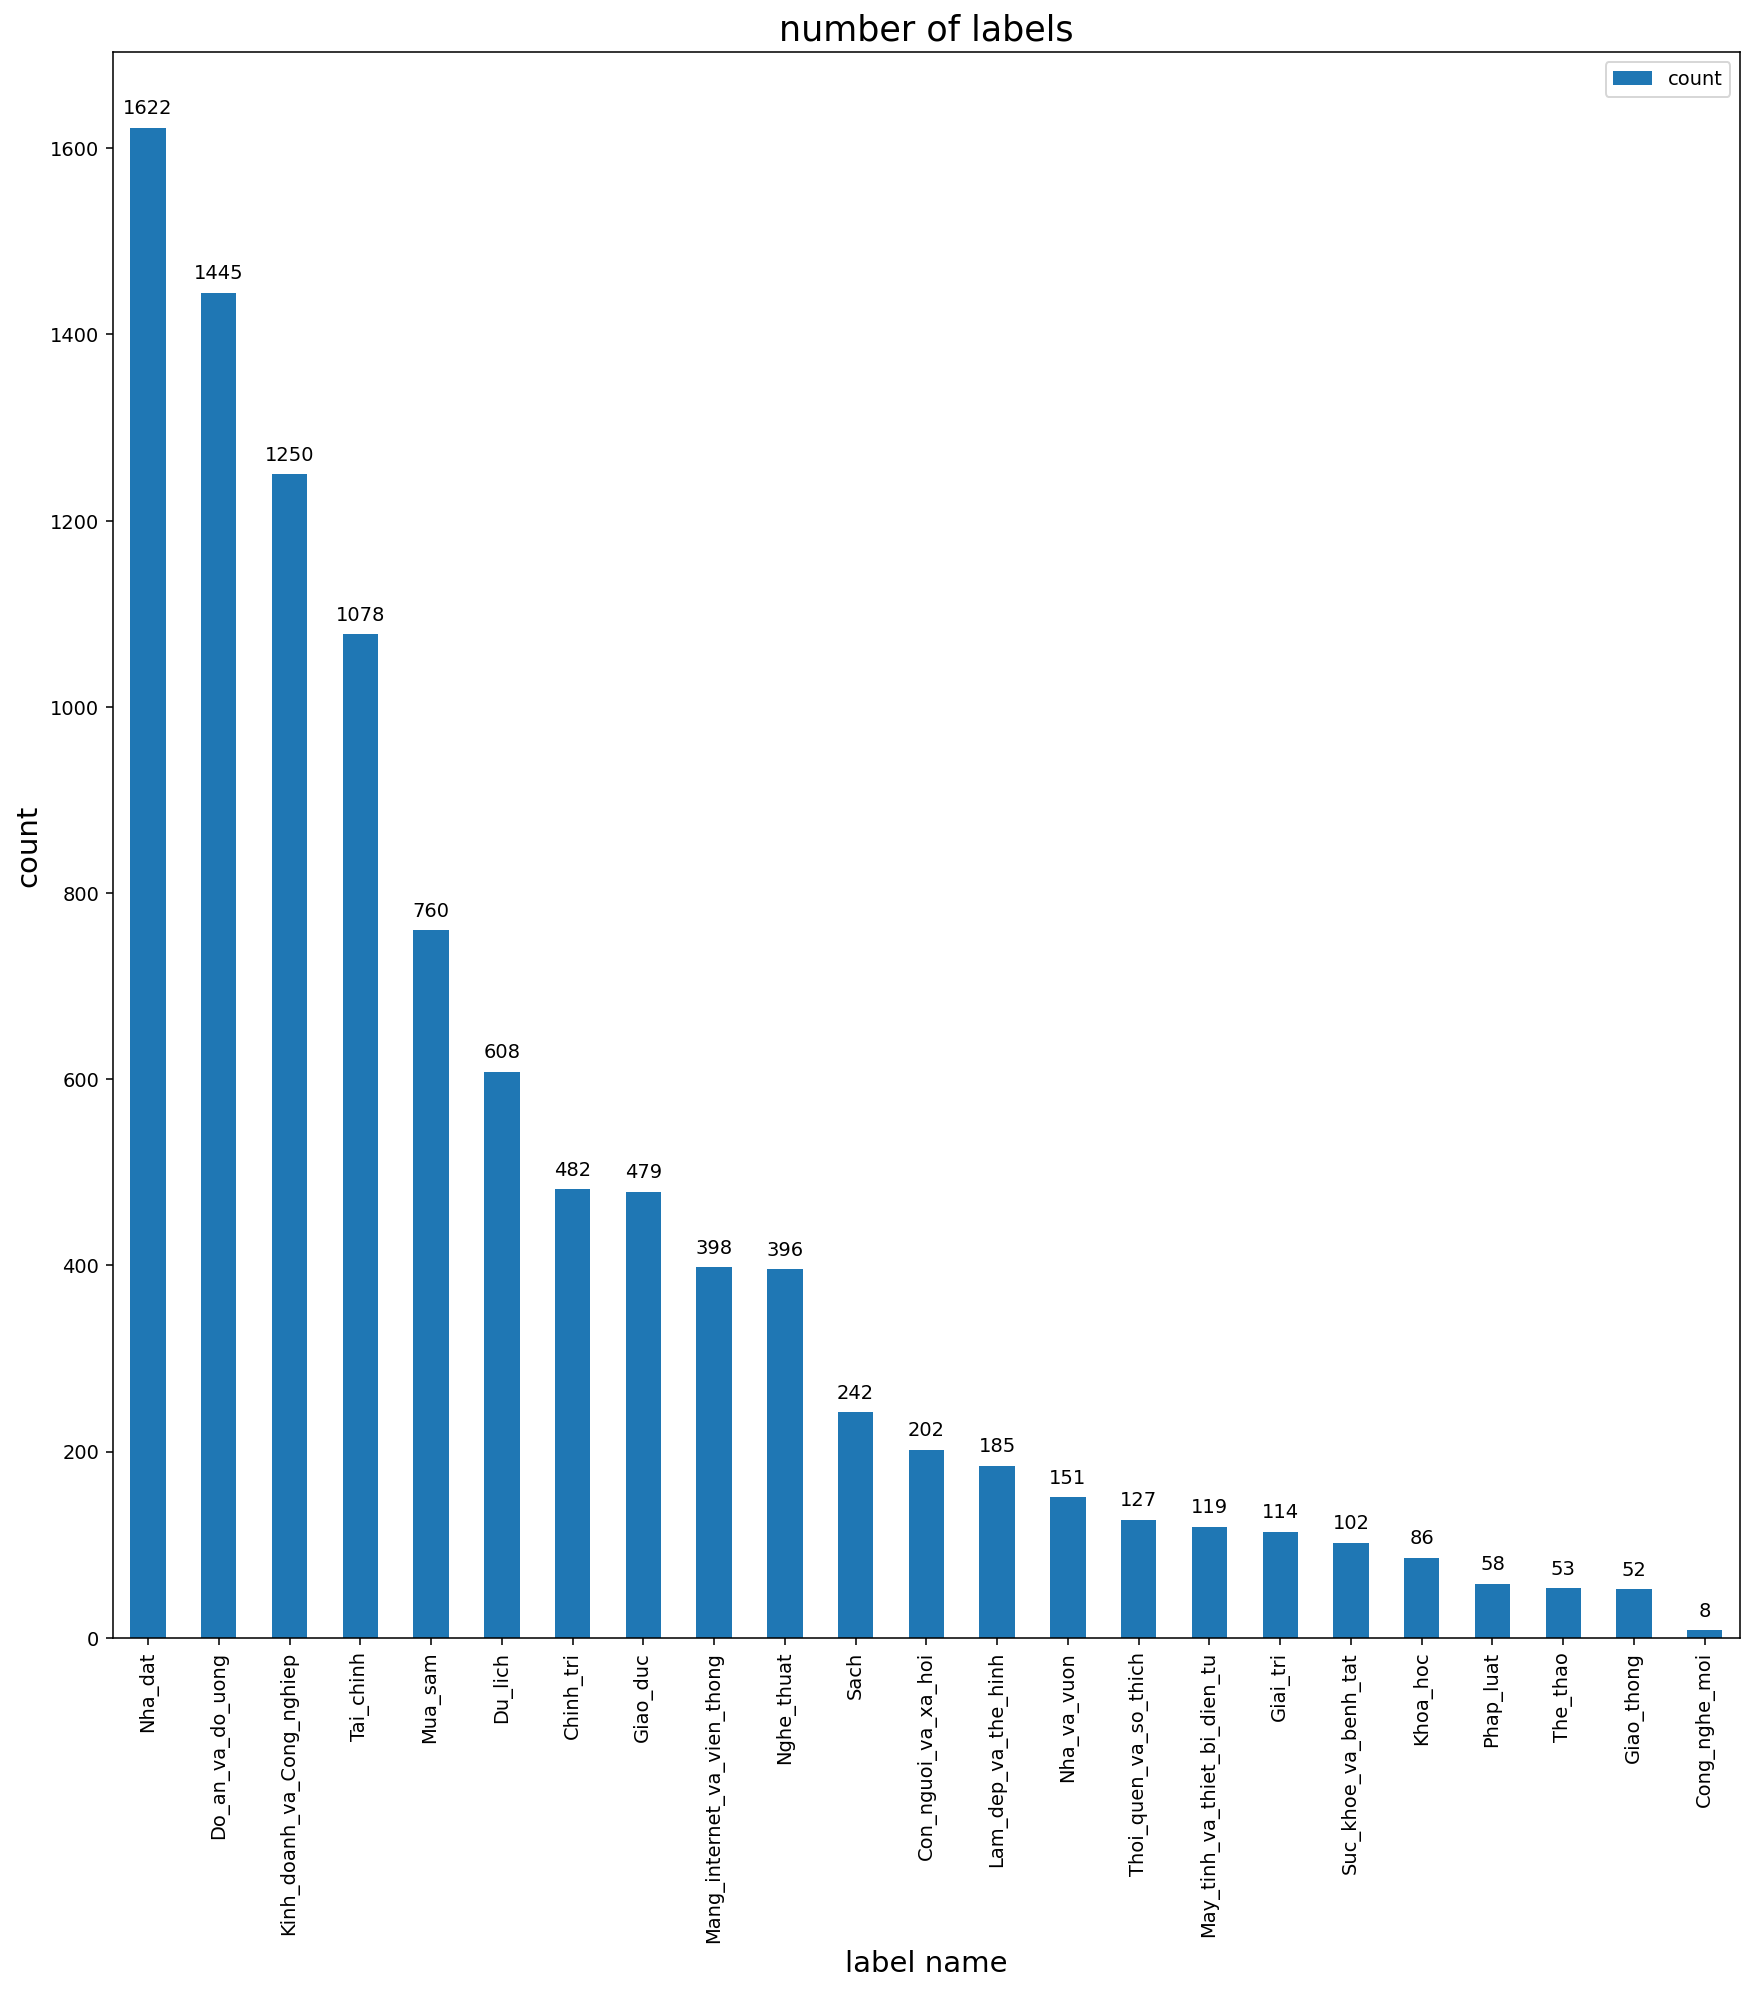

In [77]:
print('number of unique labels: ', pred_df['pred_label'].value_counts().count())
sorted_label = pred_df['pred_label'].value_counts()
sorted_label
sorted_label = sorted_label.to_frame('count')
chart = sorted_label.plot(kind='bar', figsize=(15, 15))
plt.rcParams['figure.dpi'] = 140
plt.xlabel('label name', size=15)
plt.ylabel('count', size=15)
plt.title('number of labels', size=18)
for p in chart.patches:
    chart.annotate(p.get_height(),
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.savefig(f'{SMOTE_ALL_2_MODEL_PATH_2}/stats.png')


In [78]:
file = open(f'{SMOTE_ALL_2_MODEL_PATH_2}/pred_result_custom_token.txt', 'w')
for label in pred_df.pred_label:
    res = '__label__' + label + '\n'
    file.write(res)
file.close()